In [10]:
#remove warnings
OUTDATED_IGNORE=1

import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                        MultiComparison)
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# figure size
sns.set(rc = {'figure.figsize':(16,9)},style="whitegrid")

In [11]:
post_likes = pd.read_csv('post_likes.csv')

In [12]:
post_likes.head()

,id,button,likes
0,S001,red,160
1,S002,red,150
2,S003,red,150
3,S004,red,150
4,S005,red,187


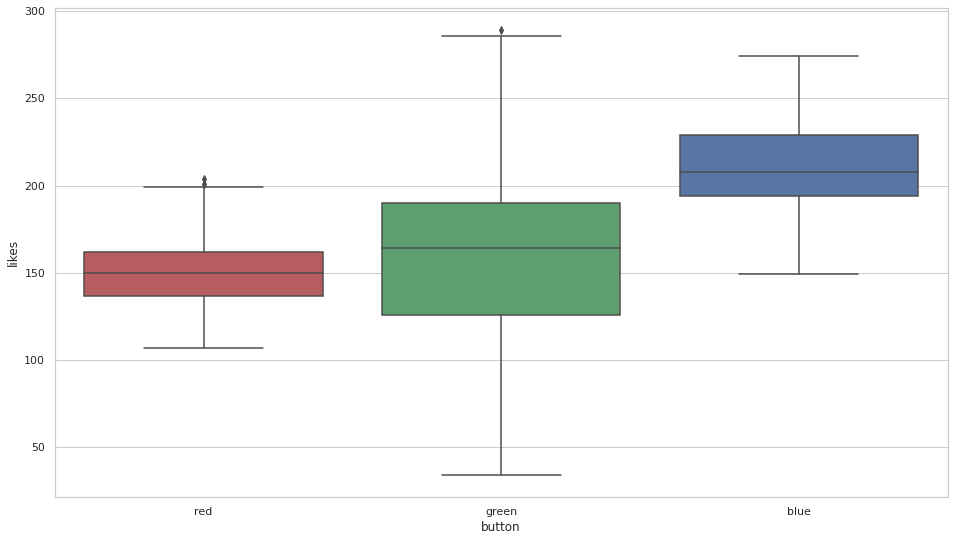

In [13]:
#draw boxplot
sns.boxplot(x = 'button', y = 'likes', data = post_likes, palette = ['r','g','b'])

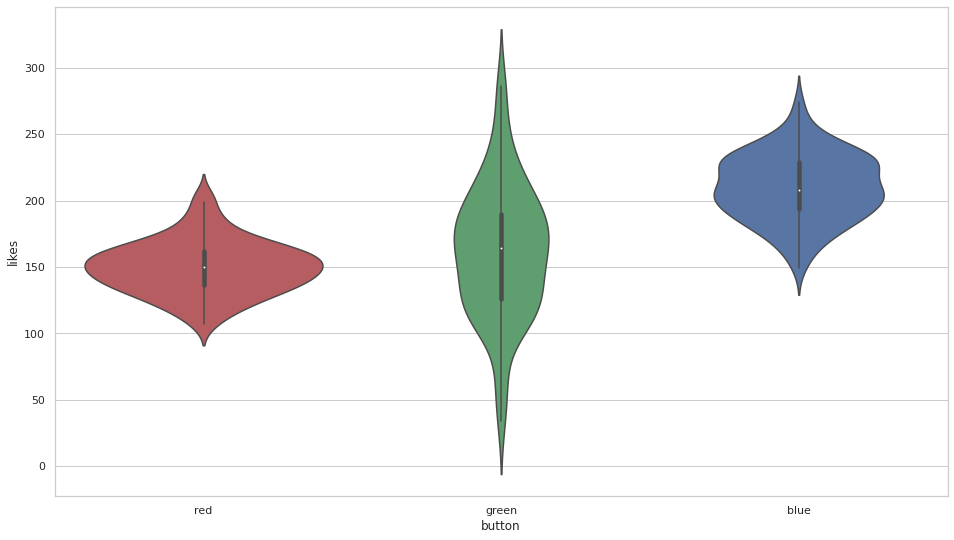

In [14]:
#draw violinplot
sns.violinplot(x = 'button', y = 'likes', data = post_likes, palette = ['r','g','b'])

### Three ways to calculate ANOVA

In [15]:
#scipy.stats
red = post_likes.query('button == "red"').likes
green = post_likes.query('button == "green"').likes
blue = post_likes.query('button == "blue"').likes


In [16]:
ss.f_oneway(red,green,blue)

F_onewayResult(statistic=85.99631112614011, pvalue=3.4370045810218544e-30)

In [17]:
#statsmodels
model = smf.ols(formula = 'likes ~ C(button)',data = post_likes).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(button),2.0,201960.286667,100980.143333,85.996311,3.437005e-30
Residual,297.0,348748.710000,1174.238081,NaN,NaN


In [18]:
#pingouin
pg.anova(data = post_likes,dv = 'likes', between = 'button', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,button,201960.286667,2,100980.143333,85.996311,3.437005e-30,0.366728
1,Within,348748.710000,297,1174.238081,NaN,NaN,NaN


### visualization and confidence interval


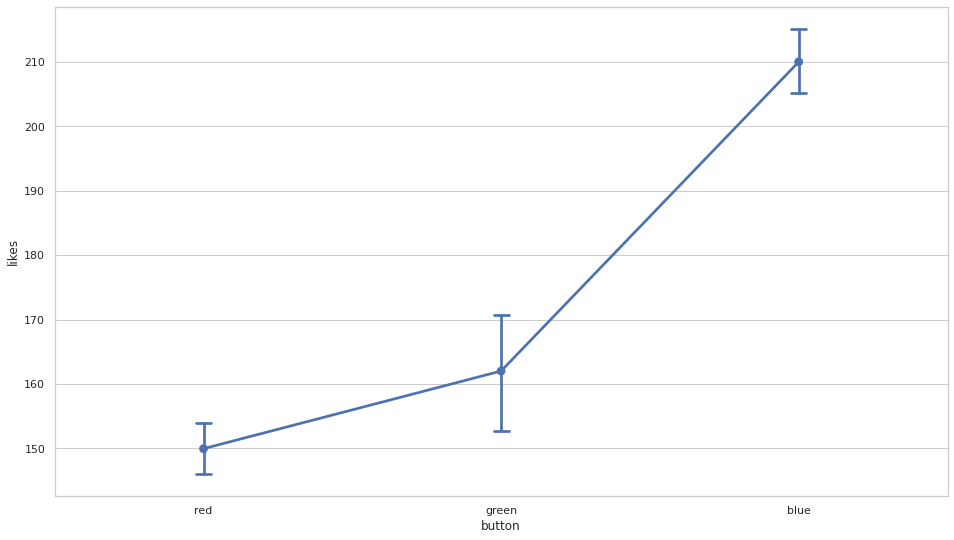

In [21]:
sns.pointplot(data = post_likes, x = 'button', y = 'likes',capsize = 0.05 )

we use normality test to allow ANOVA calc 

In [56]:
print(ss.normaltest(red))
print(ss.normaltest(blue))
print(ss.normaltest(green))

NormaltestResult(statistic=1.8343585907539965, pvalue=0.3996447324611219)
NormaltestResult(statistic=0.4606964500747045, pvalue=0.7942569741771747)
NormaltestResult(statistic=0.6727062715909409, pvalue=0.7143707913703767)


In [57]:
print(ss.shapiro(red))
print(ss.shapiro(blue))
print(ss.shapiro(green))

ShapiroResult(statistic=0.988104522228241, pvalue=0.515945315361023)
ShapiroResult(statistic=0.9937936663627625, pvalue=0.9309920072555542)
ShapiroResult(statistic=0.9887180328369141, pvalue=0.5625539422035217)


In [60]:
pg.normality(data = post_likes, dv = 'likes', group = 'button', method = 'normaltest')

,W,pval,normal
red,1.834359,0.399645,True
green,0.672706,0.714371,True
blue,0.460696,0.794257,True


homoscedasticity test

In [61]:
ss.levene(red,blue,green)

LeveneResult(statistic=35.21428243557287, pvalue=1.8886636651084242e-14)

In [63]:
pg.homoscedasticity(data = post_likes, dv = 'likes', group = 'button')

,W,pval,equal_var
levene,35.214282,1.888664e-14,False


in case of variance unequality we use ANOVA Welch test

In [65]:
pg.welch_anova(data = post_likes, dv = 'likes', between = 'button')

,Source,ddof1,ddof2,F,p-unc,np2
0,button,2,182.958104,177.856578,1.255660e-43,0.366728


## Two-way analysis of variance

In [5]:
ads_clicks = pd.read_csv('ads_clicks.csv')
ads_clicks.head()

,id,ads,age_group,clicks
0,S001,classic,18-27,40
1,S002,classic,18-27,22
2,S003,classic,18-27,41
3,S004,classic,18-27,35
4,S005,classic,18-27,39


In [25]:
#statsmodel
model_main = smf.ols('clicks ~ C(ads) + C(age_group) + C(ads):C(age_group)', data = ads_clicks).fit()
anova_lm(model_main)

,df,sum_sq,mean_sq,F,PR(>F)
C(ads),1.0,33735.001667,33735.001667,336.722432,6.446773e-60
C(age_group),2.0,400495.163333,200247.581667,1998.750536,1.636934e-264
C(ads):C(age_group),2.0,232685.043333,116342.521667,1161.260853,5.618312e-206
Residual,594.0,59510.710000,100.186380,NaN,NaN


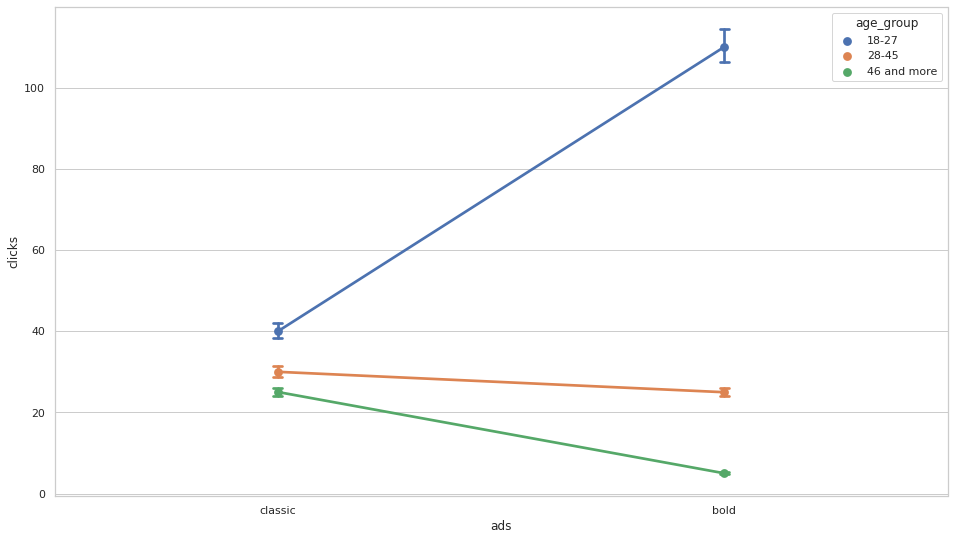

In [24]:
sns.pointplot(data = ads_clicks, x = 'ads', y = 'clicks', hue = 'age_group', capsize = 0.02)

In [27]:
#pengouin
pg.anova(data = ads_clicks, dv = 'clicks', between = ['ads','age_group'])

,Source,SS,DF,MS,F,p-unc,np2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.361786
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.870631
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.796333
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN
